In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df=pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [130]:
df['Events'].notna().sum()

1319

In [132]:
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
numric_column = [
    'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 
    'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
    'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
    'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
    'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'
]

In [136]:
df[numric_column] = df[numric_column].replace('T', 0.01)

In [138]:
df[numric_column] = df[numric_column].apply(pd.to_numeric, errors = 'coerce')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1312 non-null   float64       
 5   DewPointAvgF                1312 non-null   float64       
 6   DewPointLowF                1312 non-null   float64       
 7   HumidityHighPercent         1317 non-null   float64       
 8   HumidityAvgPercent          1317 non-null   float64       
 9   HumidityLowPercent          1317 non-null   float64       
 10  SeaLevelPressureHighInches  1316 non-null   float64       
 11  SeaLevelPressureAvgInches   1316 non-null   float64     

In [142]:
df[numric_column] = df[numric_column].interpolate(method='linear' , limit_direction='forward')

In [144]:
df.describe()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1319,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,2015-10-11 00:00:00,80.862775,70.642911,59.902957,61.571645,56.706217,51.021986,87.869598,66.667172,44.952616,30.111801,30.022635,29.931774,9.991660,9.168309,6.855193,13.234647,5.010235,21.365807,0.115337
min,2013-12-21 00:00:00,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,2014-11-15 12:00:00,72.000000,62.000000,49.000000,53.000000,46.500000,38.000000,85.000000,59.000000,32.500000,29.990000,29.910000,29.820000,10.000000,9.000000,3.000000,10.000000,3.000000,17.000000,0.000000
50%,2015-10-11 00:00:00,83.000000,73.000000,63.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,2016-09-04 12:00:00,92.000000,83.000000,73.000000,73.000000,69.125000,65.000000,94.000000,74.000000,55.000000,30.205000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,2017-07-31 00:00:00,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000
std,NaN,14.766523,14.045904,14.190648,13.572594,14.861088,16.190024,11.035467,12.462155,16.970390,0.180148,0.172043,0.171967,0.162745,1.453851,3.677284,3.424076,2.086540,5.872556,0.427933


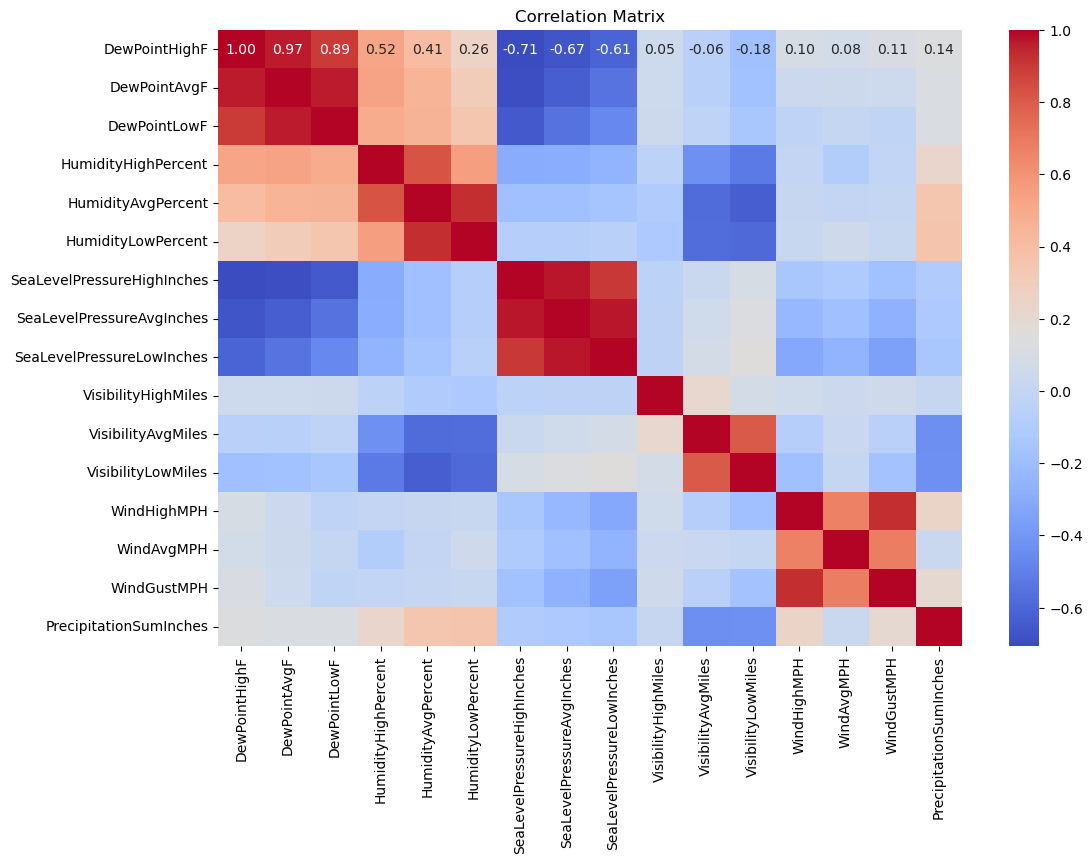

In [146]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numric_column].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

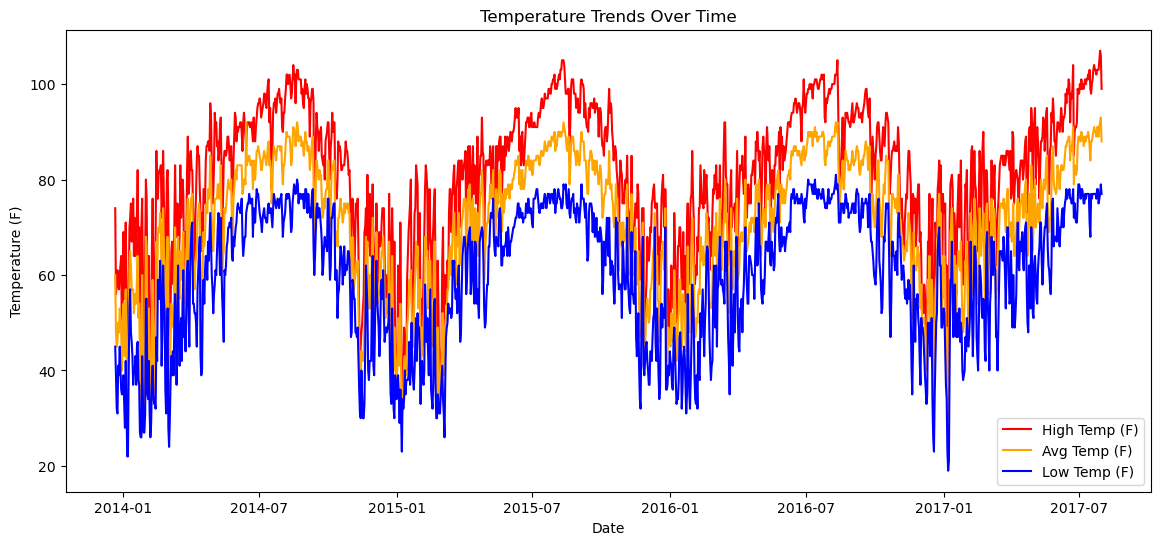

In [148]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['TempHighF'], label='High Temp (F)', color='red')
plt.plot(df['Date'], df['TempAvgF'], label='Avg Temp (F)', color='orange')
plt.plot(df['Date'], df['TempLowF'], label='Low Temp (F)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.show()

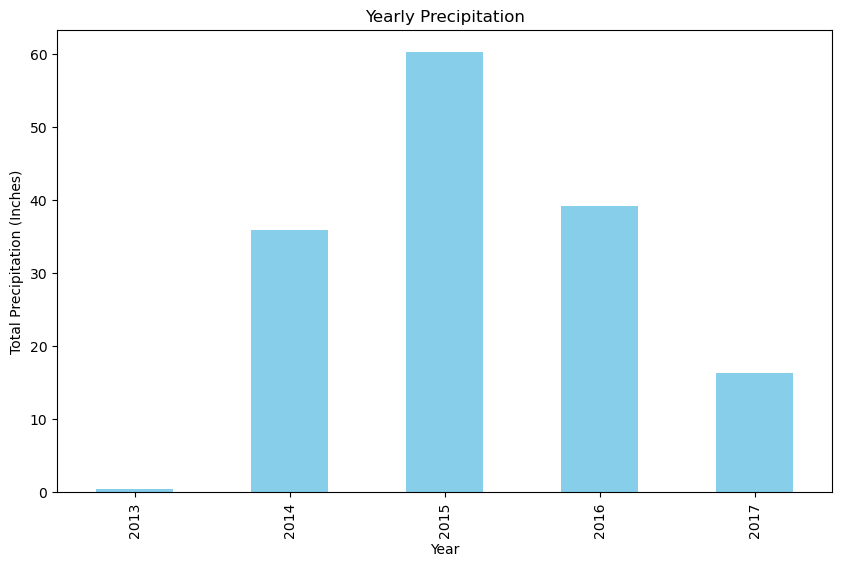

In [150]:
df['Year'] = df['Date'].dt.year
precipitation_by_year = df.groupby('Year')['PrecipitationSumInches'].sum()
plt.figure(figsize=(10, 6))
precipitation_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (Inches)')
plt.title('Yearly Precipitation')
plt.show()

In [152]:
selected_features = [
    'TempHighF', 'TempAvgF', 'DewPointAvgF', 
    'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH']

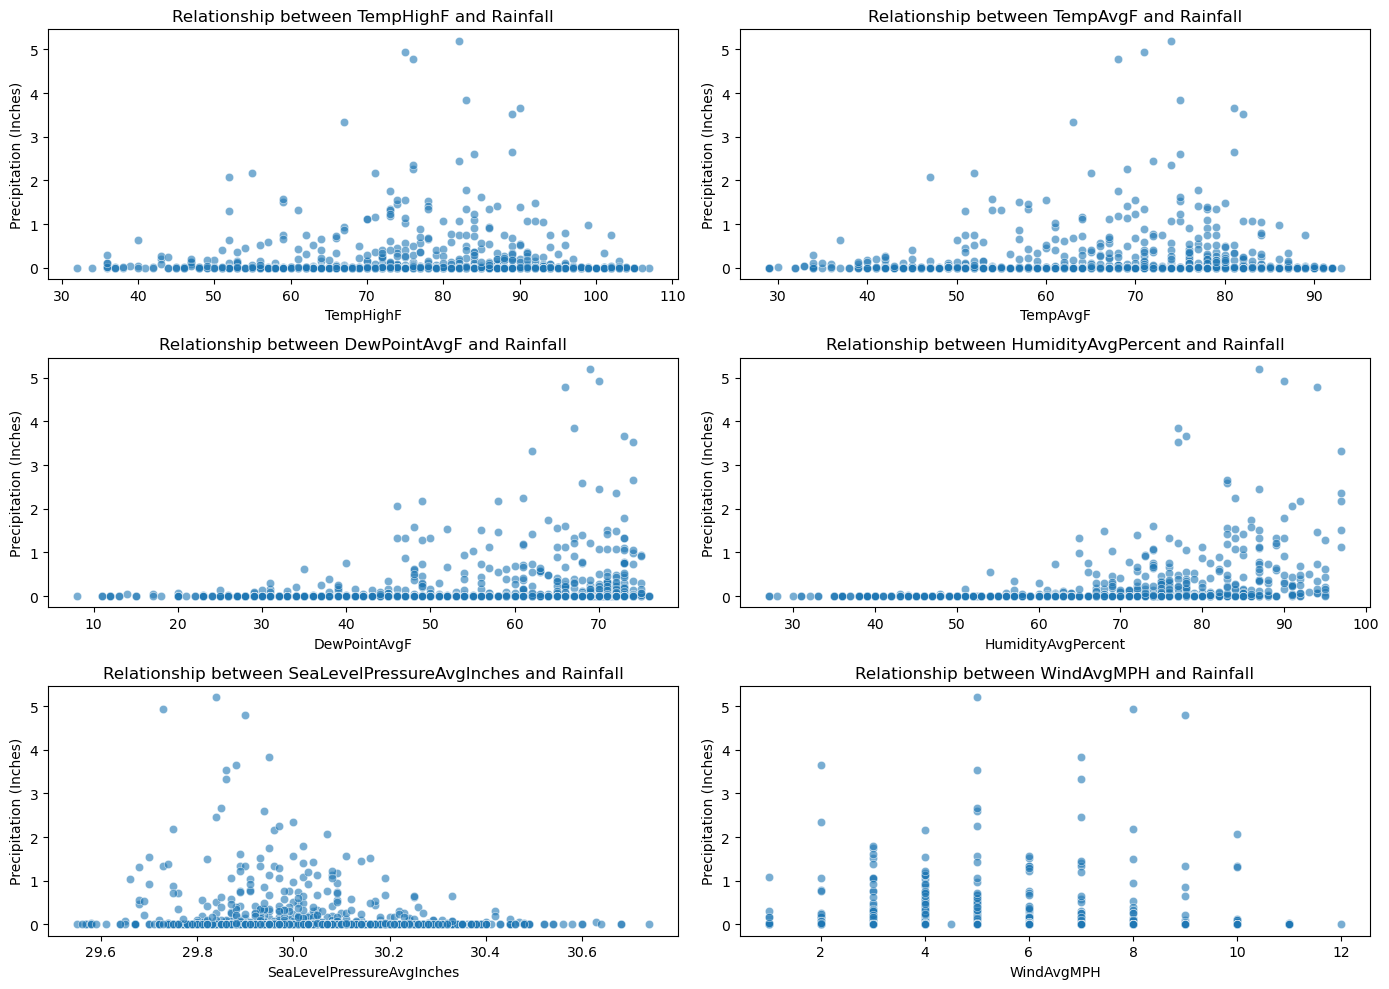

In [154]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[feature], y=df['PrecipitationSumInches'], alpha=0.6)
    plt.title(f'Relationship between {feature} and Rainfall')
    plt.xlabel(feature)
    plt.ylabel('Precipitation (Inches)')
plt.tight_layout()
plt.show()

In [160]:
df.to_csv('austin_weather_cleaned.csv', index=False)

In [93]:
features = [
    'TempHighF', 'TempAvgF', 'TempLowF',
    'DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
    'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
    'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
    'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
    'WindHighMPH', 'WindAvgMPH', 'WindGustMPH'
]

In [95]:
X = df[ features ]
y= df['PrecipitationSumInches']

In [97]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
X_train.shape

(989, 18)

In [103]:
X_test.shape

(330, 18)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
y_pred = RFR.predict(X_test)

In [111]:
from sklearn.metrics import r2_score, mean_squared_error

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 0.0982
R^2 Score: 0.5088


In [120]:
importances = RFR.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

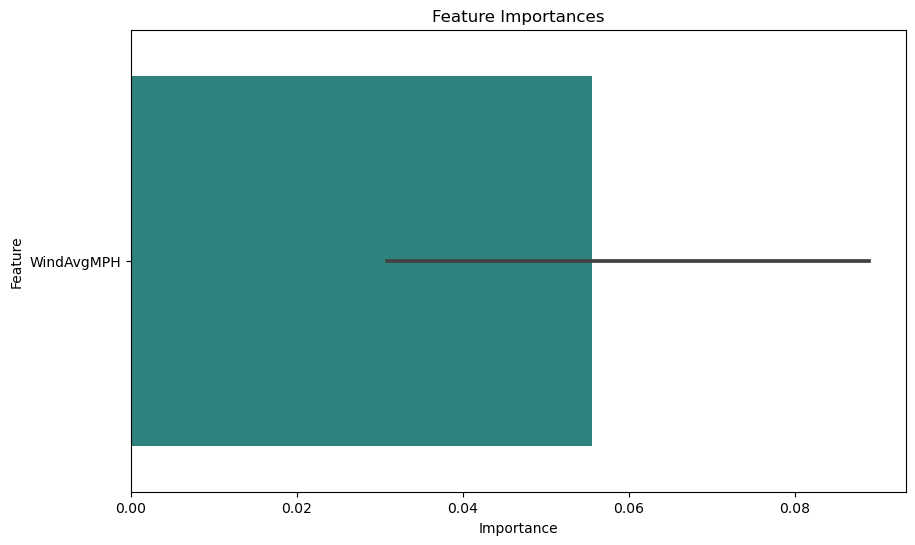

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


In [57]:
import pickle

# Save the model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(RFR, file)


In [59]:
import sklearn
sklearn.__version__

'1.5.1'